In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart issues.csv to heart issues.csv


In [ ]:
import pandas as pd
df = pd.read_csv("heart issues.csv", sep=";") #Checking the Orginial Data
df = df.iloc[:, 0].str.split(",", expand=True) #Splitting columns
df.columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","target"
]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum() # no missing data

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()
df[df.duplicated()] # views duplicates
df.drop_duplicates(inplace=True) # deletes the duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


No value being shown as the duplicates has been deleted

In [ ]:
int_cols = ["age","sex","cp","trestbps","chol","fbs","restecg",
            "thalach","exang","slope","ca","thal","target"] # everything integer
float_cols = ["oldpeak"] # only one decimals
df[int_cols] = df[int_cols].astype(int) #converts to int
df[float_cols] = df[float_cols].astype(float) #converts to float
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
df.rename(columns={
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'heart_disease'
}, inplace=True) # rename so easier to understand

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape # checks rows and columns

(302, 14)

In [ ]:
df.to_csv("cleaned_heart.csv", index=False)

from google.colab import files
files.download("cleaned_heart.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Distribution between people with heart disease and without it**

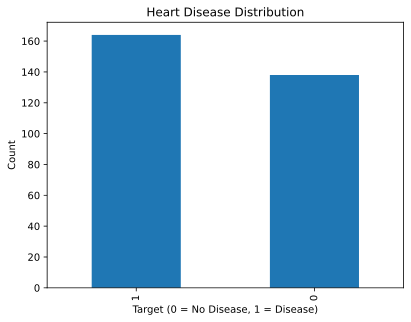

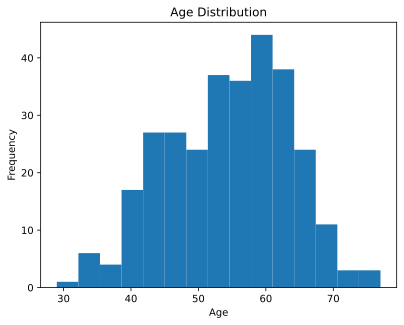

In [ ]:
import matplotlib.pyplot as plt

target_counts = df['heart_disease'].value_counts()

# Heart disease distrubution (bar chat)
plt.figure()
target_counts.plot(kind='bar')
plt.title("Heart Disease Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

# Age distribution (histrogram)
plt.hist(df['age'], bins=15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The histrogram shows that people between the age of 50 to 65, has a higher
rate of heart diseases

# **Heat map about heart disease correlation**

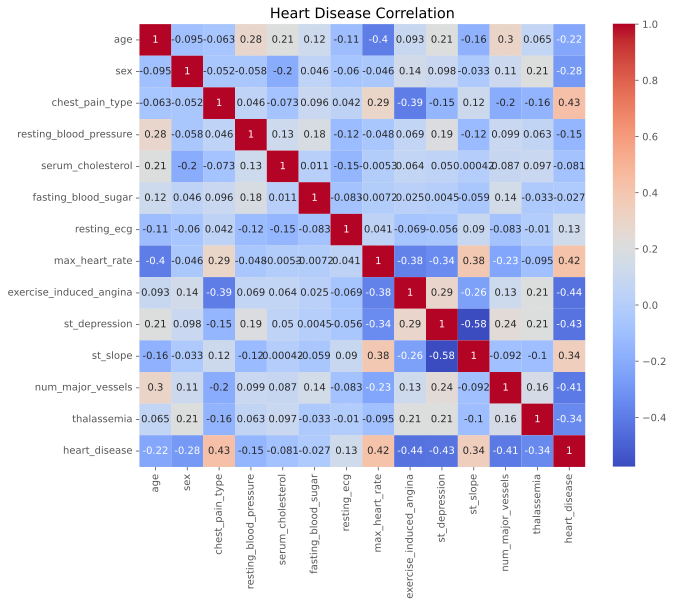

In [ ]:
import seaborn as sns

plt.style.use("ggplot")
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heart Disease Correlation")
plt.show()

There is a negative relationship between age and maximum heart rate, indicates that the maximum heart rate decreases as age increases.

+1 strong positive relationship

-1 strong negative relationship

 0 no relationship

In [ ]:
print("Average Age for Heart Diseases:")
print(df.groupby('heart_disease')['age'].mean()) # shows avg age patients with and without heart disease
print("\n")

Average Age for Heart Diseases:
heart_disease
0    56.601449
1    52.585366
Name: age, dtype: float64




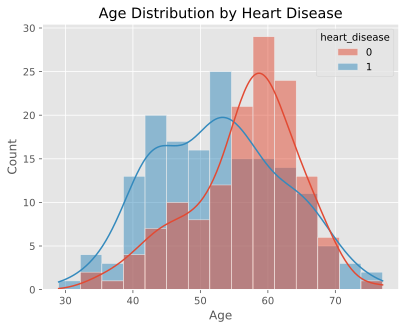

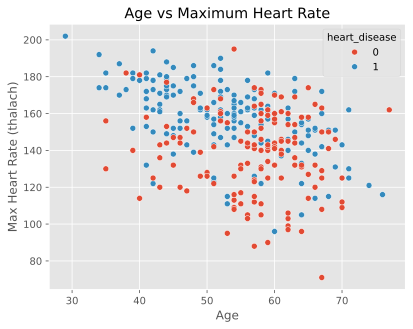

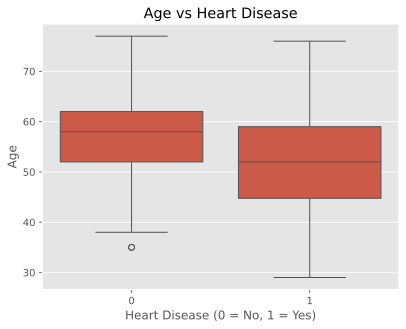

Correlation with Age:
age                        1.000000
num_major_vessels          0.302261
resting_blood_pressure     0.283121
serum_cholesterol          0.207216
st_depression              0.206040
fasting_blood_sugar        0.119492
exercise_induced_angina    0.093216
thalassemia                0.065317
chest_pain_type           -0.063107
sex                       -0.094962
resting_ecg               -0.111590
st_slope                  -0.164124
heart_disease             -0.221476
max_heart_rate            -0.395235
Name: age, dtype: float64


In [ ]:
# Distribution of Age
plt.figure()
sns.histplot(data=df, x='age', hue='heart_disease', bins=15, kde=True)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Age vs Maximum Heart Rate
plt.figure()
sns.scatterplot(x='age', y='max_heart_rate', hue='heart_disease', data=df)
plt.title("Age vs Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()

# Boxplot of Age by Heart Disease
plt.figure()
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# Correlation of Age with Other Variables
print("Correlation with Age:")
print(df.corr()['age'].sort_values(ascending=False)) # shows how age is related to other numerical value

Majority of patients fall between 40 and 60 years old.Age shows a moderate relation with the heart disease.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# First split: Train (70%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y   # it keeps the class balance
)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

# Check shapes
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

X_train: (211, 13)
X_val: (45, 13)
X_test: (46, 13)


The dataset was split into training(70%), validation(15%) and testing(15%) sets using stratified sampling to preserve class distribution.

Training set = 211 samples
Validation set = 45 samples
Test set = 46 samples

# Testing Support Vector Machine

In [ ]:
#Support Vector Machine (SVC)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
# Load Dataset
data = pd.read_csv("cleaned_heart.csv")
X = data.drop("heart_disease" , axis=1)
y = data["heart_disease"]

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and predict
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

print("SVC - Answer")
print("Validation:",accuracy_score(y_test, y_pred_svc))
print("Classification report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVC - Answer
Validation: 0.8016528925619835
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76        55
           1       0.78      0.88      0.83        66

    accuracy                           0.80       121
   macro avg       0.81      0.79      0.80       121
weighted avg       0.80      0.80      0.80       121

Confusion Matrix:
 [[39 16]
 [ 8 58]]


The model achieved a validation accuracy of 80%,showing that it can predict heart disease.It also indicates that the SVC has an overall good performance.